## 1. Análise dos Aplicativos da Google Play Store e suas avaliações
<p>Aplicativos móveis estão por toda parte. Eles são fáceis de criar e podem ser lucrativos. Por causa desses dois fatores, cada vez mais aplicativos estão sendo desenvolvidos. Neste notebook, faremos uma análise abrangente do mercado de aplicativos para Android, comparando mais de dez mil aplicativos no Google Play em diferentes categorias. Buscaremos insights nos dados para elaborar estratégias para impulsionar o crescimento e a retenção.</p>

Os dados consistem em dois arquivos:

<li><code>apps.csv</code>: contém todos os detalhes dos aplicativos da Google Play. Existem 13 features que descrevem cada aplicativo</li>
<li><code>user_reviews.csv</code>: contém 100 avaliações para cada aplicativo <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">(mais detalhes destes dados clique aqui)</a>. O texto de cada avaliação foi pré-processado e atribuído um sentimento, podendo ser (Positive, Negative or Neutral), </li>
</ul>

In [1]:
from google.colab import files
uploaded = files.upload()  #fazendo upload do arquivo no google colab

Saving apps.csv to apps.csv


In [3]:
# Importando os dados
import pandas as pd
apps = pd.read_csv('apps.csv')


In [ ]:
# Dando uma olhada nos dados
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [ ]:
# Olhando uma amostra aleatória do dataset
apps.sample(5)  #.sample() retorna uma amostra do dataset apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1384,1682,Race the Traffic Moto,GAME,3.8,270687,38.0,"10,000,000+",Free,0,Teen,Racing,"July 20, 2018",1.0.16,4.0.3 and up
4495,5458,AP Planner,FAMILY,2.9,45,1.3,"5,000+",Free,0,Everyone,Education,"August 3, 2015",1.1,2.1 and up
8293,9417,Sensenuts eI,BUSINESS,NaN,0,NaN,5+,Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
8200,9321,EG CrossPad,BUSINESS,NaN,3,NaN,"1,000+",Free,0,Everyone,Business,"December 19, 2016",Varies with device,Varies with device
5307,6315,BJ-FPV,FAMILY,4.2,16,26.0,"1,000+",Free,0,Everyone,Casual,"July 31, 2018",2.0.2,4.4 and up


Neste ponto percebemos que temos valores nulos nas colunas "Rating", "Size","Current Ver" e "Android Ver".

É interessante observarmos que o método .info identificou a quantidade de dados não nulos nas colunas citadas.

In [ ]:
# Print a quantidade total de aplicativos
print('Número total de aplicativos no dataset = ', apps['Unnamed: 0'].value_counts().sum())

# Drop duplicates
apps = apps.drop_duplicates()

Número total de aplicativos no dataset =  9659


In [ ]:
print('Número total de aplicativos no dataset sem duplicados = ', apps['Unnamed: 0'].value_counts().sum())

Número total de aplicativos no dataset sem duplicados =  9659


Sem linhas duplicadas, perfeito.

## 2. Limpeza dos Dados
As quatro features que vamos usar mais são Installs, Size, Rating e Price. Podemos observar na função info () da célula anterior que as colunas Installs e Price são do tipo Object e não int64 ou float64 como esperaríamos (aliás são informações que deveriam ser valores numéricos). 

Isso ocorre porque a coluna contém alguns caracteres a mais do que apenas dígitos de 0 a 9.

Portanto, precisamos fazer uma limpeza nestes dados e prepará-los para serem consumidos em nossa análise posterior. Especificamente, a presença de caracteres especiais (, $ +) nas colunas Installs e Price dificulta sua conversão para numérico

In [5]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [6]:
apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Aqui identificamos quais são os caracteres que estão "sujando" nossos dados, sabendo disso vamos prosseguir com a limpeza dos dados.

In [7]:

carac_to_remove = ['+',',','$'] #esta é a lista de caracteres que devem ser removidos

cols_to_clean = ['Installs','Price'] #lista de colunas que devemos limpar

# Fazendo um Loop em cada coluna
for col in cols_to_clean:
    # Substituindo os caracteres por uma string vazia
    for char in carac_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char,'')
    # Convertendo as colunas para um formato numérico
    apps[col] = pd.to_numeric(apps[col]) 

A lógica de funcionamento deste loop for é a seguinte:

Para cada 'col' na lista 'cols_to_clean' será executado outro loop for que para cada 'char' em 'carac_to_remove' irá selecionar a coluna 'col' do dataframe apps, vai convertê-lo para string e substituir (replace) os caracteres por uma string vazia ''.

## 3. Explorando as categorias dos aplicativos
<p>Com mais de 1 bilhão de usuários ativos em 190 países ao redor do mundo, o Google Play continua a ser uma plataforma de distribuição importante para construir um público global. Para que as empresas apresentem seus aplicativos aos usuários, é importante torná-los mais rápidos e facilmente detectáveis ​​no Google Play. Para melhorar a experiência geral de pesquisa, o Google introduziu o conceito de agrupar aplicativos em categorias.

Isso nos leva às seguintes questões:</p>
<ul>
<li>Qual categoria tem a maior participação de aplicativos (ativos) no mercado?
 </li>
<li>Existe alguma categoria específica dominando o mercado?</li>
<li>Quais categorias têm o menor número de aplicativos?</li>
</ul>
<p>Vamos explorar os dados e responder estas questões.</p>

Número de categorias =  33


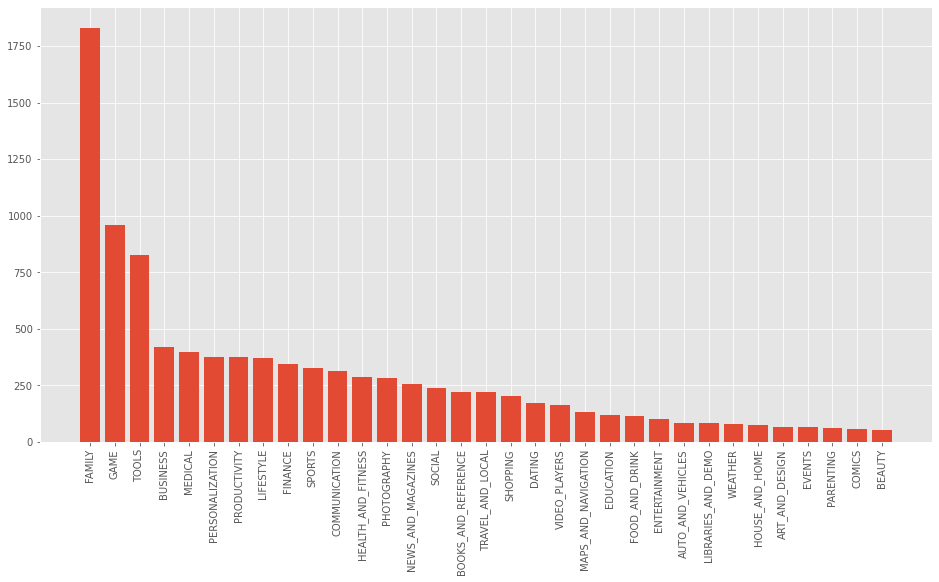

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Número de categorias = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(16,8))
plt.tight_layout()
plt.style.use('ggplot')
plt.bar(x = num_apps_in_category.index, height=num_apps_in_category.values) # value = count
plt.xticks(rotation=90)
plt.show()

Podemos observar que temos ao todo 33 categorias de aplicativos nos nossos dados.

A categoria que tem a maior participação no mercado(maior quantidade de aplicativos) é a categoria de Apps "Family", seguido por "Game","TOOLS" e "Business".

Agora para as categorias com menor participação, têm se: "Beauty","Comics" e "Parenting".